<a href="https://colab.research.google.com/github/JayedTamim/Thesis_Updated/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
%matplotlib inline
df = pd.read_csv('tamim11.csv')

In [2]:
df.head()

,Age,ShortnessBreath,Oxygen,PulseRate,Temperature,Result
0,44,0,97,86,102,Negative
1,50,1,85,115,96,Positive
2,34,1,85,52,99,Positive
3,69,1,94,61,102,Positive
4,44,0,95,103,103,Negative


In [3]:
df.shape

(367, 6)

In [4]:
df.tail()

,Age,ShortnessBreath,Oxygen,PulseRate,Temperature,Result
362,65,0,93,90,97,Negative
363,76,0,92,102,103,Positive
364,72,0,85,79,97,Positive
365,46,1,88,109,104,Positive
366,65,0,91,94,97,Negative


In [5]:
df.isna().sum()

Age                0
ShortnessBreath    0
Oxygen             0
PulseRate          0
Temperature        0
Result             0
dtype: int64

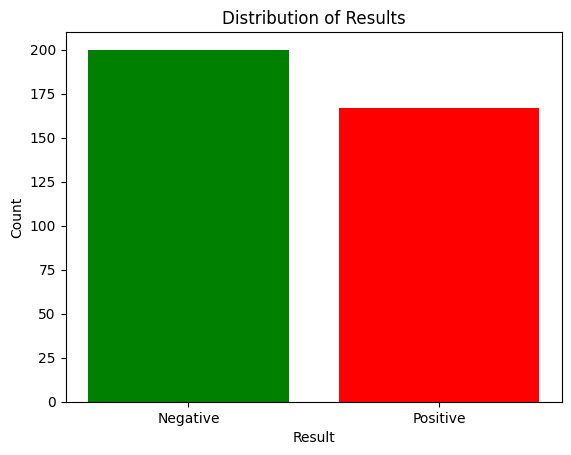

In [6]:
import matplotlib.pyplot as plt

# Count the occurrences of each result
result_counts = df['Result'].value_counts()

# Plot the bar chart
plt.bar(result_counts.index, result_counts.values, color=['green', 'red'])
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Distribution of Results')
plt.show()


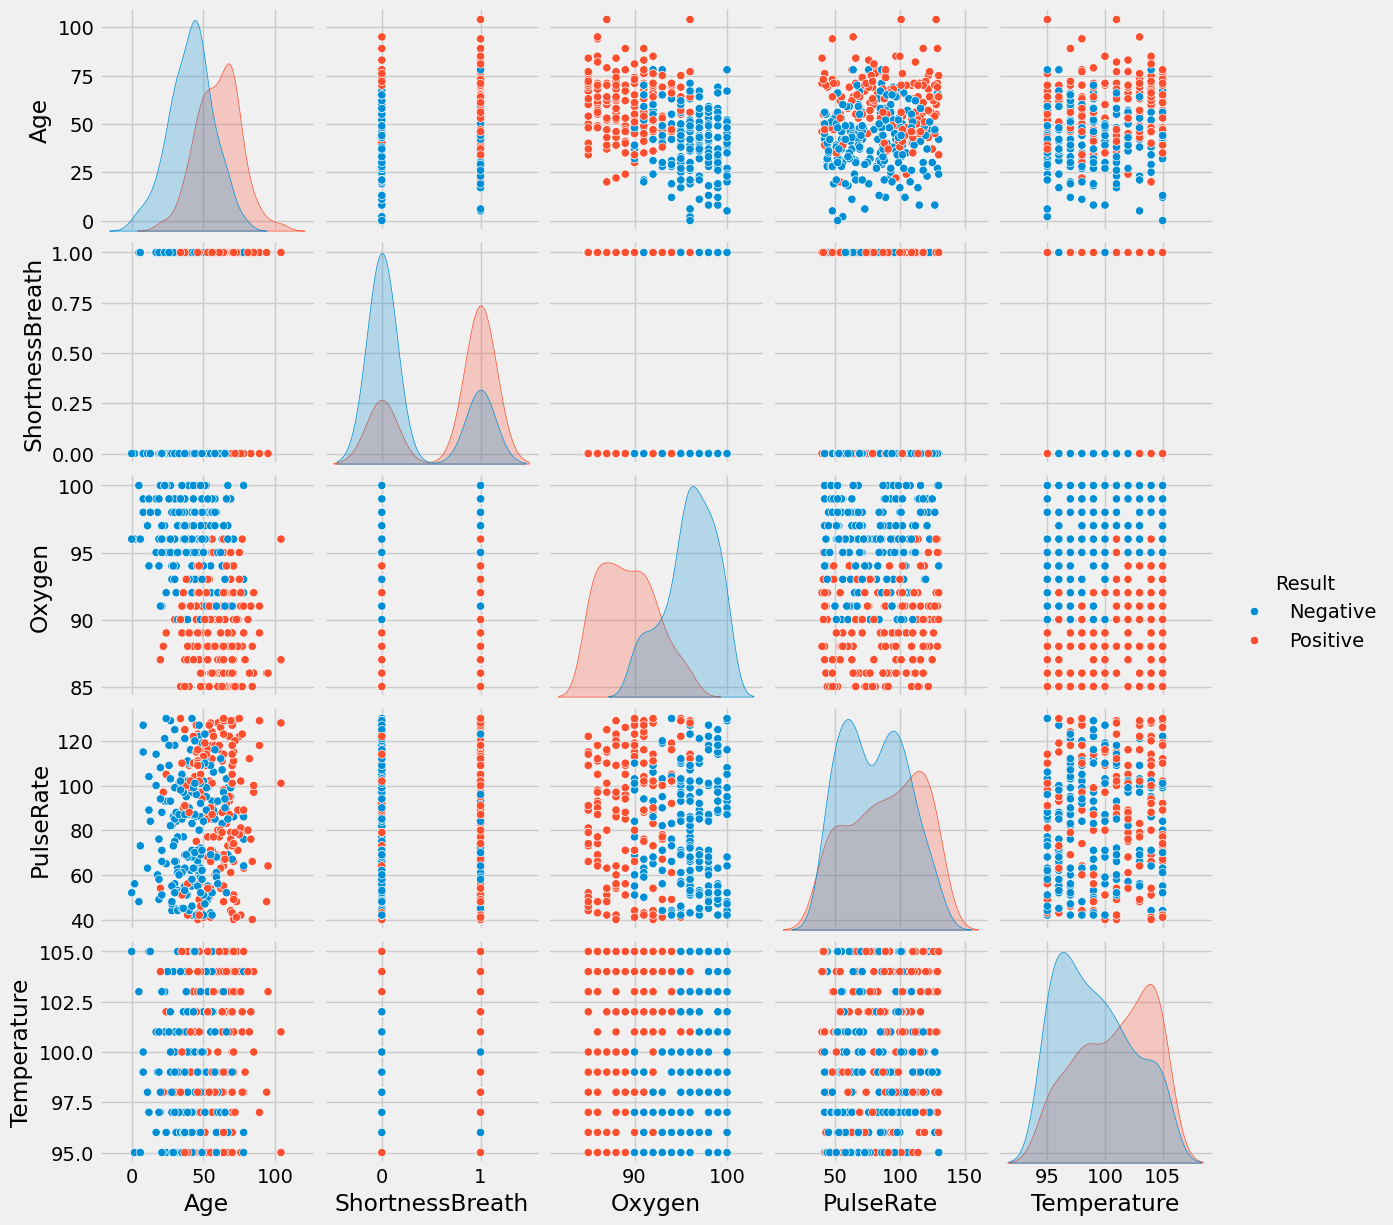

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

sns.pairplot(data=df, hue='Result')
plt.show()


In [8]:
df['Result'].replace(['Positive', 'Negative'], [1, 0], inplace=True)


In [9]:
df['Result'].unique()

array([0, 1])

In [10]:
x = df.drop('Result',axis=1)
y = df['Result']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [12]:
x_train.shape

(256, 5)

In [13]:
x_test.shape

(111, 5)

In [14]:
y_train.shape

(256,)

In [15]:
y_test.shape

(111,)

In [16]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [17]:


# Separate features and labels
x = df.iloc[:, 1:-1].values  # Assuming the features are in columns 1 to -2
y = df['Result'].values

# Encode the labels for binary classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Pad sequences for LSTM input (assuming x is a sequence of features)
max_sequence_length = x_train.shape[1]
x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

# Determine the vocabulary size based on the maximum integer value in your sequences
vocab_size = np.max([np.max(x_train), np.max(x_test)]) + 1

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_sequence_length))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check the architecture
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred_prob_test = model.predict(x_test)
y_pred_test = (y_pred_prob_test > 0.5).astype(int)

# Calculate accuracy for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 50)             6550      
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 26801 (104.69 KB)
Trainable params: 26801 (104.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
9/9 [==============================] - 5s 136ms/step - loss: 0.6913 - accuracy: 0.6806 - val_loss: 0.6898 - val_accuracy: 0.7000
Epoch 2/10
9/9 [==============================] - 0s 15ms/step - loss: 0.6853 - accuracy: 0.7072 - val_loss: 0.6857 - val_accuracy: 0.6333
Epo

In [18]:
# Evaluate the model on the training set
y_pred_prob_train = model.predict(x_train)
y_pred_train = (y_pred_prob_train > 0.5).astype(int)

# Calculate accuracy for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")

10/10 [==============================] - 0s 5ms/step
Training Accuracy: 90.10%


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

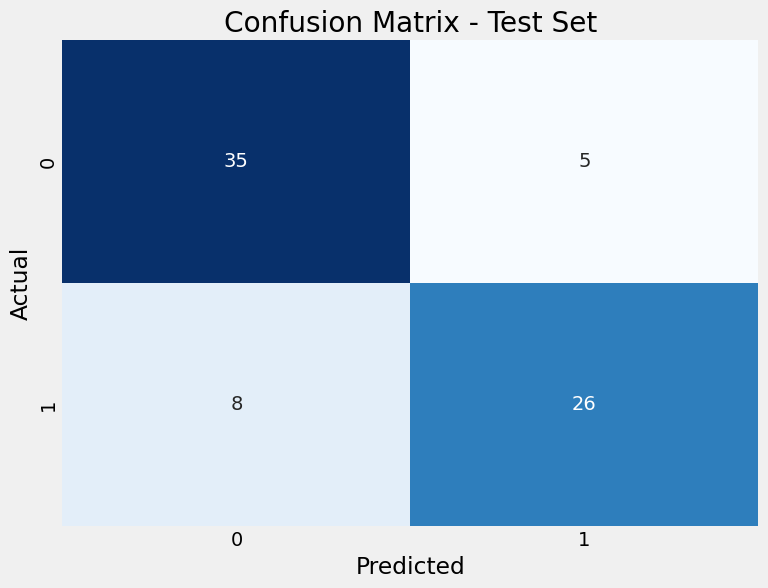

In [20]:
# Create Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

10/10 [==============================] - 0s 9ms/step


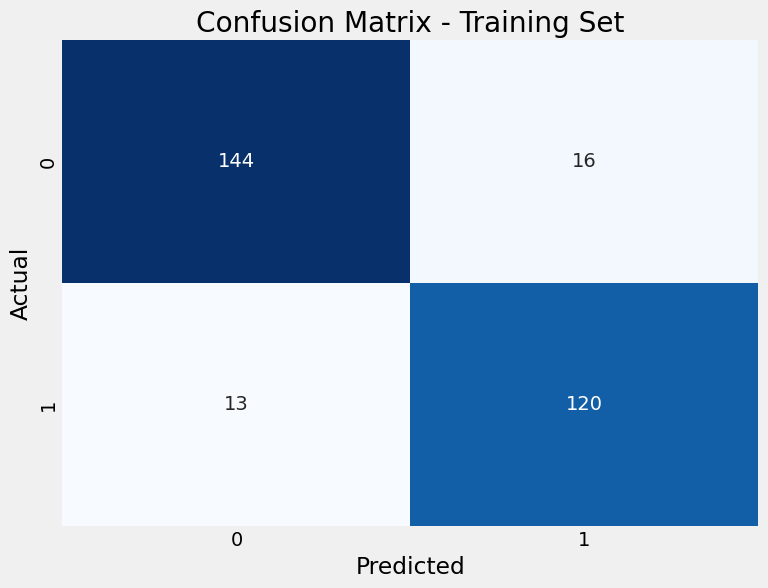

In [21]:
# Evaluate the model on the training set
y_pred_prob_train = model.predict(x_train)
y_pred_train = (y_pred_prob_train > 0.5).astype(int)

# Create Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_pred_train)

# Plot Confusion Matrix for Training Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()